In [33]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy
from sklearn.decomposition import PCA

import optuna
# from src.kernel_pca import CenteredKernelPCA as KPCA


In [25]:
data = pd.read_csv("../data/CoLA/mixed_dev_embeddings.tsv", sep="\t")
X = data.iloc[:, 3:771].to_numpy()
X_index = data['defining set id'].to_numpy()

Text(0.5, 0, 'the number of components')

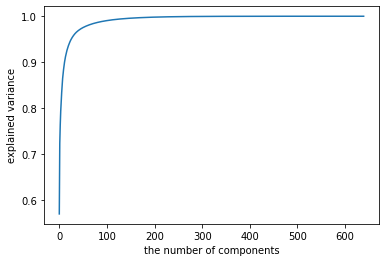

In [59]:
# data visualization
eigvals = PCA().fit(X).explained_variance_
explained_var = np.cumsum(eigvals) / np.sum(eigvals)
plt.plot(explained_var)
plt.ylabel('explained variance')
plt.xlabel('the number of components')

In [34]:
def SortSampleIndex(X, X_index, inplace=True, return_value=False):
    """Sort samples so that the X_index is sorted.
    
    Parameters
    ----------
    X: array [n_samples, n_features]
    X_index: array: [n_samples]
    
    """
    arg = np.argsort(X_index)
    if inplace:
        X = X[arg]
        X_index = X_index[arg]
    else:
        return_value = True
        X = np.copy(X[arg])
        X_index = np.copy(X_index[arg]) 
    if return_value:
        return X, X_index

def CenterLinearly(X, X_index):
    """Sort samples so that the X_index is sorted.
    
    Parameters
    ----------
    X: array [n_samples, n_features]
    X_index: array: [n_samples]
    
    """
    DX = _get_design_matrix(X_index)
    centeredX = DX @ X
    return centeredX
    
def _get_design_matrix(index):
    """Calculate the design matrix for group-mean-centering
    
    Example:
    Given ``index = [1, 1, 2, 2, np.nan]``, the design matrix becomes
                          [[1/2, 1/2,    0,   0, 0],
                           [1/2, 1/2,    0,   0, 0],
    np.eye(5) - np.array(  [  0,   0,  1/2, 1/2, 0],  )
                           [  0,   0,  1/2, 1/2, 0],
                           [  0,   0,    0,   0, 0]]
    """
    N = index.shape[0]
    mask_nan = np.isnan(index)
    N_nan = sum(mask_nan)
    _, group_counts = np.unique(index[~mask_nan], return_counts=True)
    assert np.all(group_counts > 1)  # There must be more than 2 elements in each group.
    blocks = [np.full([c, c], 1./c) for c in group_counts] + [0.0] * N_nan
    design_matrix = scipy.sparse.eye(N) - scipy.sparse.block_diag(blocks)
    return design_matrix

In [60]:
SortSampleIndex(X, X_index, inplace=True, return_value=False)
cX = CenterLinearly(X, X_index)

In [83]:
pca = PCA(n_components=1).fit(cX)
X_tr = pca.transform(X)
X_orth = X - pca.inverse_transform(X_tr)

In [84]:
np.linalg.norm(X_orth)

372.82486163269624

In [85]:
np.linalg.norm(X)

426.1726765040533

In [80]:
pca = PCA(n_components=600)
kpca = KernelPCA(n_components=600, kernel="rbf")

In [83]:
pca.fit(X)
kpca.fit(X)

KernelPCA(kernel='rbf', n_components=600)

In [13]:
np.argsort(np.arange(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])